# Introduction to Machine Learning and Deep Learning

### Acknowledgements

The content of this notebook was originally created by Nils Eckstein, Julia Buhmann, and Jan Funke for the 2021 DL@MBL course in Woods Hole, and later chopped up and modified by Florian Jug for the 2021 course DL4MIA.

Some code cells will be marked with

########################################################################### <br>
#######                      START OF YOUR CODE                     ####### <br>
########################################################################### <br>

... <br>

########################################################################### <br>
#######                       END OF YOUR CODE                      ####### <br>
########################################################################### <br>

This indicates that you need to write a piece of code or select one of the several provided options to complete the notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The Perceptron...

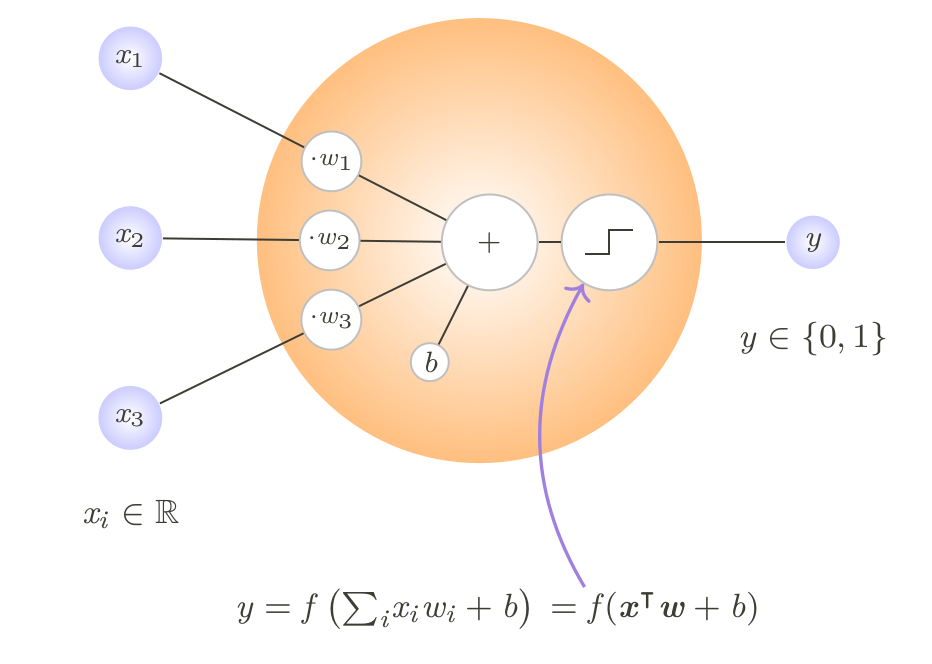

As we saw in the lecture, a perceptron is a simple unit that computes a weighted sum of its inputs $x_i$ (using weights $w_i$ and a bias $b$), and feeds this weighted sum to a non-linear function $f$.

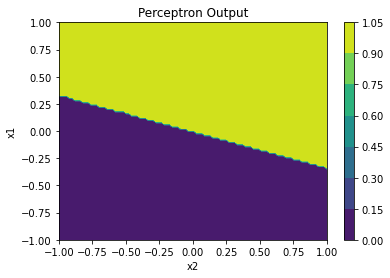

In [2]:
def perceptron(x, w, b, f):
    '''Implement your solution here.'''
    
    ###########################################################################
    #######                      START OF YOUR CODE                     #######
    ###########################################################################
    
    # Compute the activation!
    # Currently it's just set to 0.0 for each given node...
    # (Note that multiple nodes could be given to this function...)
    # HINT: Be sure to check the cell above
    
    activation = x.dot(w) + b

    ###########################################################################
    #######                       END OF YOUR CODE                      #######
    ###########################################################################

    return f(activation)
    
# so, let's test what you did with some test weights, bias, and f

w = np.array([0.3, 0.1])
b = 0.0
f = lambda a: 0.0 if a <= 0 else 1.0 # step activation function
#f = lambda a: 1.0/(1 + np.exp(-a)) # sigmoid activation function


# NEXT: plot output for x in [-1, 1]
# ----------------------------------
num = 100  # number of points in x1 and x2
x1s = np.linspace(-1, 1, num=num)
x2s = np.linspace(-1, 1, num=num)
xs = np.stack(np.meshgrid(x1s, x2s)).T.reshape(-1,2)
ys = np.array(list(perceptron(x, w, b, f) for x in xs))
ys = ys.reshape(num, num)

plt.title("Perceptron Output")
plt.contourf(x1s, x2s, ys)
plt.ylabel("x1")
plt.xlabel("x2")
plt.colorbar()
plt.show()

### Task: Create a 2-Layer Network that can learn the XOR function...

XOR is a fundamental logic gate that outputs `1` whenever there is an odd number of `1` in its input and `0` otherwise. For two inputs this can be thought of as an "exclusive or" operation and the associated boolean function is fully characterized by the following truth table.

| x1 | x2 | y = XOR(x1, x2) |
|---|---|----------|
| 0 | 0 |    0     |
| 0 | 1 |    1     |
| 1 | 0 |    1     |
| 1 | 1 |    0     |

The function of an XOR gate can also be understood as a classification problem on $x \in \{0,1\}^2$ and we can think about designing a classifier acting as an XOR gate. It turns out that this problem is not solvable by a single perceptron (https://en.wikipedia.org/wiki/Perceptron) because the set of points $\{(0,0), (0,1), (1,0), (1,1)\}$ is not linearly seperable.

If you don't see that right away, go ahead and try it yourself... draw these four points in a two dimensional plot and label them with two colors depending on the output of XOR being 0 or 1. You will notice, you can't draw a staight line to separate the one two diagonal points from the other two.

But there is a  way out: you can create a little network of perceptrons capable of learning the XOR function.

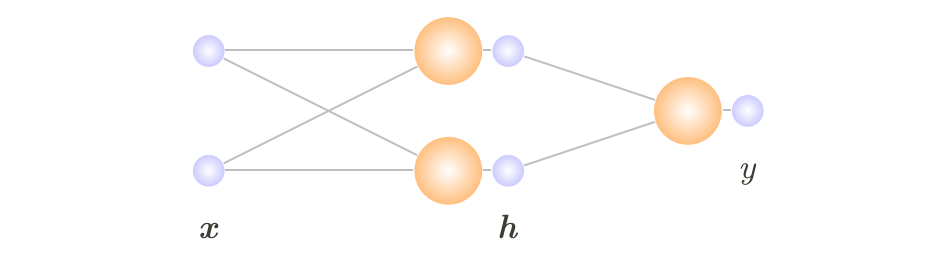

Design a two layer perceptron like the one shown above by using your `perceptron` function to implement an XOR Gate on two inputs. Think about the flow of information through this simple network and *set the weight values by hand* such that the network produces the XOR function.

A single layer in a multilayer perceptron can be described by the equation $y = f(x^\intercal w + b)$ with $f$ a nonlinear function. $b$ is the so called bias, a constant offset vector and $w$ a vector of weights. Since we are only interested in outputs of `0` or `1`, a good choice for $f$ is the threshold function (Heaviside step function). Think about which kind of logical operations you can implement with a single perceptron, then see how you can combine them to create an XOR. 

#### Hint
You might want to solve this task on paper before you even look at the code below. Once you have found a solution, it will be easy to fill in the weights and biases below so that the right results will be computed...

In [3]:
def generate_xor_data():
    xs = [np.array([i, j]) for i in [0,1] for j in [0,1]]
    ys = [int(np.logical_xor(x[0], x[1])) for x in xs]
    return xs, ys
    
print(generate_xor_data())

([array([0, 0]), array([0, 1]), array([1, 0]), array([1, 1])], [0, 1, 1, 0])


In [4]:
def threshold(vector):
    return (vector>=0.0).astype(float)

# our two-layer perceptron containing three nodes
# Note: input x and weights w00, w01, and w1 are arrays of length 2, 
#       while the biases b01, b02, and b1 are scalar values.
def mlp(x, w00, b00, w01, b01, w1, b1, f):
    x00 = perceptron(x, w00, b00, f)
    x01 = perceptron(x, w01, b01, f)
    x0 = np.array([x00, x01])
    x1 = perceptron(x0, w1, b1, f)
    return x1


###########################################################################
#######                      START OF YOUR CODE                     #######
###########################################################################

# Set the right weights... 
# (currently they are all zeros...)
# Hint: create logic data to pass to mlp function: AND(NOT X, Y), AND(X, NOT Y), OR(X,Y)
w00 = np.array([-1.0, 1.0])
w01 = np.array([1.0, -1.0])
w1 = np.array([1.0, 1.0])

# Set the right biases too...
b00 = -1/3.0
b01 = 1.0/3
b1 = -1/3.0

###########################################################################
#######                       END OF YOUR CODE                      #######
###########################################################################



# Check if you found a solution...
print("Input", "Output", "XOR")
xs, ys = generate_xor_data()
for x, y in zip(xs, ys):
    print(x, int(mlp(x, 
                     w00, 
                     b00,
                     w01,
                     b01,
                     w1, 
                     b1, 
                     threshold)),"    ", y)

Input Output XOR
[0 0] 1      0
[0 1] 1      1
[1 0] 1      1
[1 1] 1      0


# Task: building larger networks...

After the last exercise, immagine we would ask you to write code to create a slightly larger MLP (multi-layer perceptron) like the one shown below.

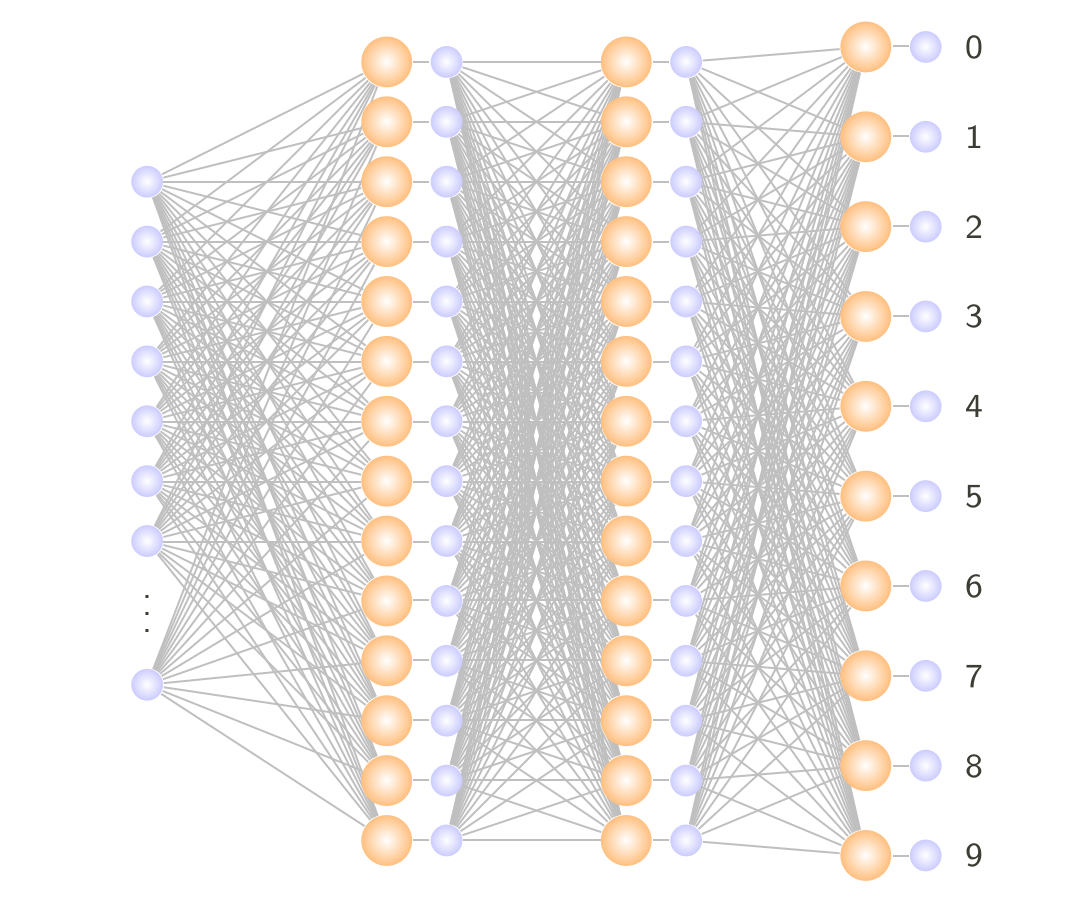

That would likely take some time, even without also implementing a training procedure as well. Additionally, spoiler alert, your code would likely be quie slow at the end and you would have to think about how to make it faster. For example... by implementing it all again to be execute on GPUs...

Luckily this was already done by others and in the second intro exercise we will use Tensorflow (and Keras) to implement a larger network that learns from given example data

**Next:** please open and run the jupyter notebook **02_Exercise_MLPs_in_Keras** in the same folder as this exercise...